### 9.1. Implementing a Densely Connected Neural Network with TensorFlow 2.0

#### Importing Required Libraries

In [ ]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.0)


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
banknote_data = pd.read_csv("https://raw.githubusercontent.com/AbhiRoy96/Banknote-Authentication-UCI-Dataset/master/bank_notes.csv")

In [ ]:
banknote_data.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
banknote_data.shape

(1372, 5)

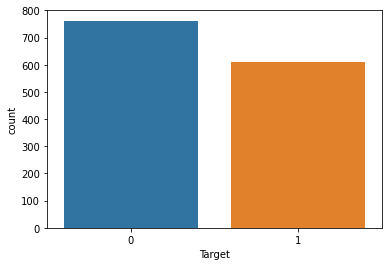

In [ ]:
sns.countplot(x='Target', data=banknote_data)

In [ ]:
X = banknote_data.drop(['Target'], axis=1).values
y = banknote_data[['Target']].values

print(X.shape)
print(y.shape)

(1372, 4)
(1372, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def create_model(learning_rate, dropout_rate):

#create sequential model
    model = Sequential()
#adding dense layers
    model.add(Dense(12, input_dim=X_train.shape[1],  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6,  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
#compiling the model
    adam = Adam(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
dropout_rate = 0.1
epochs = 20
batch_size = 4
learn_rate = 0.001

In [ ]:
model = create_model(learn_rate, dropout_rate)

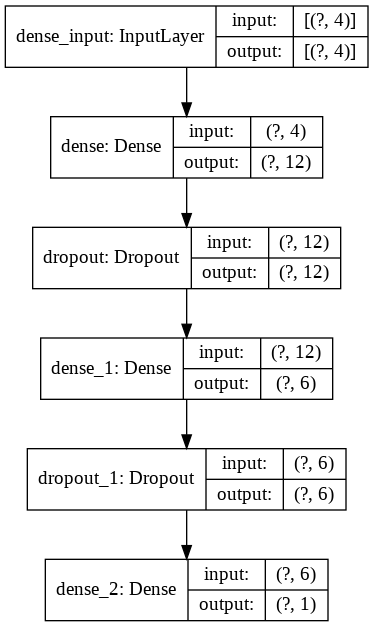

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [ ]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/20
220/220 [==============================] - 1s 4ms/step - loss: 0.5473 - accuracy: 0.7674 - val_loss: 0.4593 - val_accuracy: 0.8182
Epoch 2/20
220/220 [==============================] - 1s 4ms/step - loss: 0.3597 - accuracy: 0.8860 - val_loss: 0.2681 - val_accuracy: 0.9227
Epoch 3/20
220/220 [==============================] - 1s 3ms/step - loss: 0.2350 - accuracy: 0.9236 - val_loss: 0.1514 - val_accuracy: 0.9409
Epoch 4/20
220/220 [==============================] - 1s 4ms/step - loss: 0.1687 - accuracy: 0.9441 - val_loss: 0.0917 - val_accuracy: 0.9818
Epoch 5/20
220/220 [==============================] - 1s 4ms/step - loss: 0.1284 - accuracy: 0.9544 - val_loss: 0.0601 - val_accuracy: 0.9864
Epoch 6/20
220/220 [==============================] - 1s 4ms/step - loss: 0.1007 - accuracy: 0.9635 - val_loss: 0.0460 - val_accuracy: 0.9864
Epoch 7/20
220/220 [==============================] - 1s 4ms/step - loss: 0.0894 - accuracy: 0.9647 - val_loss: 0.0359 - val_accuracy: 0.9864
Epoch 

In [ ]:
accuracies = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", accuracies[0])
print("Test Accuracy:", accuracies[1])

9/9 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 1.0000
Test Score: 0.014491557143628597
Test Accuracy: 1.0


In [ ]:
history_dict = model_history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


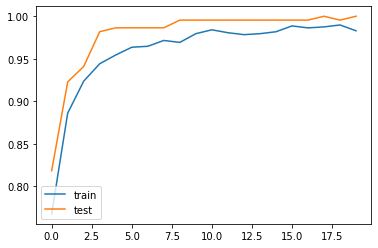

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train','test'], loc='lower left')


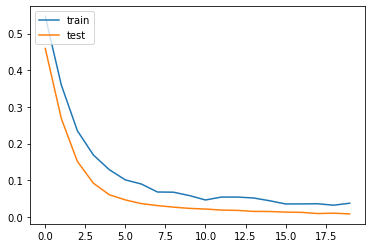

In [ ]:

plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test'], loc='upper left')